

---



# Install libraries

In [17]:

#!pip install google-play-scraper

In [18]:
!pip install PySastrawi

# Import Library

In [19]:
from google_play_scraper import Sort, reviews_all, reviews
import re
import pandas as pd
import numpy as np
import datetime as dt
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
# from google_play_scraper import Sort, reviews_all, reviews
import nltk
# import calendar
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Retrieve a user review of the halodoc application from the Google Play web site.

Dalam mengambil ulasan aplikasi halodoc, saya menggunakan library reviews untuk mendapatkan semua informasi yang akan digunakan untuk analisis, seperti reviewID, username, content, score, date, dll.

In [20]:
#from google_play_scraper import Sort, reviews_all
#result = reviews_all(
 #   'com.linkdokter.halodoc.android',  #domain Aplikasi yang ingin discrape
  #  sleep_milliseconds=0, # defaults to 0
   # lang='id', # defaults to 'en'
    #country='id', # defaults to 'us'
    #sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT , you can use Sort.NEWEST to get newst review)

In [21]:
#df_raw = pd.DataFrame(np.array(result),columns=['review'])
#df_raw = df_raw.join(pd.DataFrame(df_raw.pop('review').tolist()))
#df_raw.head()

In [22]:
#Menghitung jumlah data yang berhasil didapatkan
#len(df_raw.index)

In [23]:
#menyimpan hasil scrape dalam file .csv
#df_raw.to_csv("halodoc.csv", index = False)

# Connect & import the datasets from Google Drive

In [24]:
#!gdown --id 1pb4L9tmt4xKxNe4wVKXdtj2Kh9ynx_Ef

# Read the dataset

In [25]:
halodoc = pd.read_csv('halodoc.csv')
halodoc.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,6dfa9c73-b2bb-464b-b9b8-9f73c217fd14,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Pelayanan sangat bagus.,5,0,21.51,2024-06-06 00:01:37,Hai Liana! Terima kasih sudah menggunakan Halo...,2024-06-06 00:21:40,21.51
1,f145d42c-fdb3-44f7-bfcd-a9dff6d9cf61,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ini pesen obat lewat apotek halodoc terkonfirm...,1,0,21.51,2024-06-05 23:58:56,Hai MELANI PUTRI! Mohon maaf atas ketidaknyama...,2024-06-06 00:05:32,21.51
2,00465c1b-23d1-4325-b2be-c56ef3f0b777,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ok,5,0,21.51,2024-06-05 23:30:36,Hai Rama Rama! Terima kasih sudah menggunakan ...,2024-06-06 00:05:50,21.51
3,671b363b-07cf-4f50-b5d6-feeb3b0934d4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Jhoz,5,0,21.51,2024-06-05 23:27:05,Hai premm Fals! Terima kasih sudah menggunakan...,2024-06-06 00:05:44,21.51
4,a0584efc-0c3f-4da0-a3b7-a7f3d267a2d0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Benar² rekomendasi,5,0,21.51,2024-06-05 16:14:57,Hai Novika Ayu Wananda! Terima kasih sudah men...,2024-06-05 16:39:50,21.51




---



# Data Exploration

## Displays the entire dataset column

In [26]:
halodoc.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion'],
      dtype='object')

## Summary

In [27]:
# menampilkan ringkasan dataset yang berisi jumlah baris dan tipe data
info = halodoc.info()
print('Ringkasan informasi:', info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              9000 non-null   object 
 1   userName              9000 non-null   object 
 2   userImage             9000 non-null   object 
 3   content               9000 non-null   object 
 4   score                 9000 non-null   int64  
 5   thumbsUpCount         9000 non-null   int64  
 6   reviewCreatedVersion  7620 non-null   float64
 7   at                    9000 non-null   object 
 8   replyContent          9000 non-null   object 
 9   repliedAt             9000 non-null   object 
 10  appVersion            7620 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 773.6+ KB
Ringkasan informasi: None


## Find Missing Values

In [28]:
# menghitung dan menampilkan missing values
print('Jumlah missing values disetiap kolom:\n', halodoc.isnull().sum())

Jumlah missing values disetiap kolom:
 reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    1380
at                         0
replyContent               0
repliedAt                  0
appVersion              1380
dtype: int64


Ada 2 kolom yang mempunyai banyak missing values berjumlah 1000, yaitu replyContent dan repliedAt. Selain itu, terdapat kolom yang berisi missing values yang berjumlah 300 NaN, yaitu reviewCreatedVersion. Kolom replyContent dan repliedAt tidak dilakukan pengisian nilai karena berisi balasan ulasan yang diberikan oleh pihak halodoc terhadap ulasan pengguna dan tanggal balasannya. Sedangkan missing values yang terdapat di kolom reviewCreatedVersion tidak diisi karena berisi versi dari aplikasi halodoc.

## Remove Missing Values

In [29]:
# menghapus kolom replyContent, repliedAt, dan reviewCreatedVersion yang berisi missing values
halodoc = halodoc.drop(['reviewCreatedVersion' , 'appVersion'], axis=1)
halodoc.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,at,replyContent,repliedAt
0,6dfa9c73-b2bb-464b-b9b8-9f73c217fd14,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Pelayanan sangat bagus.,5,0,2024-06-06 00:01:37,Hai Liana! Terima kasih sudah menggunakan Halo...,2024-06-06 00:21:40
1,f145d42c-fdb3-44f7-bfcd-a9dff6d9cf61,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ini pesen obat lewat apotek halodoc terkonfirm...,1,0,2024-06-05 23:58:56,Hai MELANI PUTRI! Mohon maaf atas ketidaknyama...,2024-06-06 00:05:32
2,00465c1b-23d1-4325-b2be-c56ef3f0b777,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ok,5,0,2024-06-05 23:30:36,Hai Rama Rama! Terima kasih sudah menggunakan ...,2024-06-06 00:05:50
3,671b363b-07cf-4f50-b5d6-feeb3b0934d4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Jhoz,5,0,2024-06-05 23:27:05,Hai premm Fals! Terima kasih sudah menggunakan...,2024-06-06 00:05:44
4,a0584efc-0c3f-4da0-a3b7-a7f3d267a2d0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Benar² rekomendasi,5,0,2024-06-05 16:14:57,Hai Novika Ayu Wananda! Terima kasih sudah men...,2024-06-05 16:39:50


## Rename the columns

In [30]:
# mengganti nama kolom tanggal
halodoc.rename(columns={'at':'date'},inplace=True)
print('mengecek nama kolom yang sudah diganti:', halodoc.columns)

mengecek nama kolom yang sudah diganti: Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'date', 'replyContent', 'repliedAt'],
      dtype='object')


## Separate the date in the timestamp of the At column

In [31]:
# memisahkan tanggal yang terletak di timestamps
halodoc['date'] = pd.to_datetime(halodoc['date']).dt.date
halodoc.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,date,replyContent,repliedAt
0,6dfa9c73-b2bb-464b-b9b8-9f73c217fd14,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Pelayanan sangat bagus.,5,0,2024-06-06,Hai Liana! Terima kasih sudah menggunakan Halo...,2024-06-06 00:21:40
1,f145d42c-fdb3-44f7-bfcd-a9dff6d9cf61,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ini pesen obat lewat apotek halodoc terkonfirm...,1,0,2024-06-05,Hai MELANI PUTRI! Mohon maaf atas ketidaknyama...,2024-06-06 00:05:32
2,00465c1b-23d1-4325-b2be-c56ef3f0b777,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ok,5,0,2024-06-05,Hai Rama Rama! Terima kasih sudah menggunakan ...,2024-06-06 00:05:50
3,671b363b-07cf-4f50-b5d6-feeb3b0934d4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Jhoz,5,0,2024-06-05,Hai premm Fals! Terima kasih sudah menggunakan...,2024-06-06 00:05:44
4,a0584efc-0c3f-4da0-a3b7-a7f3d267a2d0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Benar² rekomendasi,5,0,2024-06-05,Hai Novika Ayu Wananda! Terima kasih sudah men...,2024-06-05 16:39:50


In [32]:
# memisahkan tahun dan bulan
halodoc['year'] = pd.to_datetime(halodoc['date']).dt.year
halodoc['month'] = pd.to_datetime(halodoc['date']).dt.month
# halodoc['month'] = halodoc['month'].apply(lambda x: calendar.month_abbr[x])

# Data Visualization

<ipython-input-33-dd8df104fc13>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="score", data=halodoc, palette="pastel")


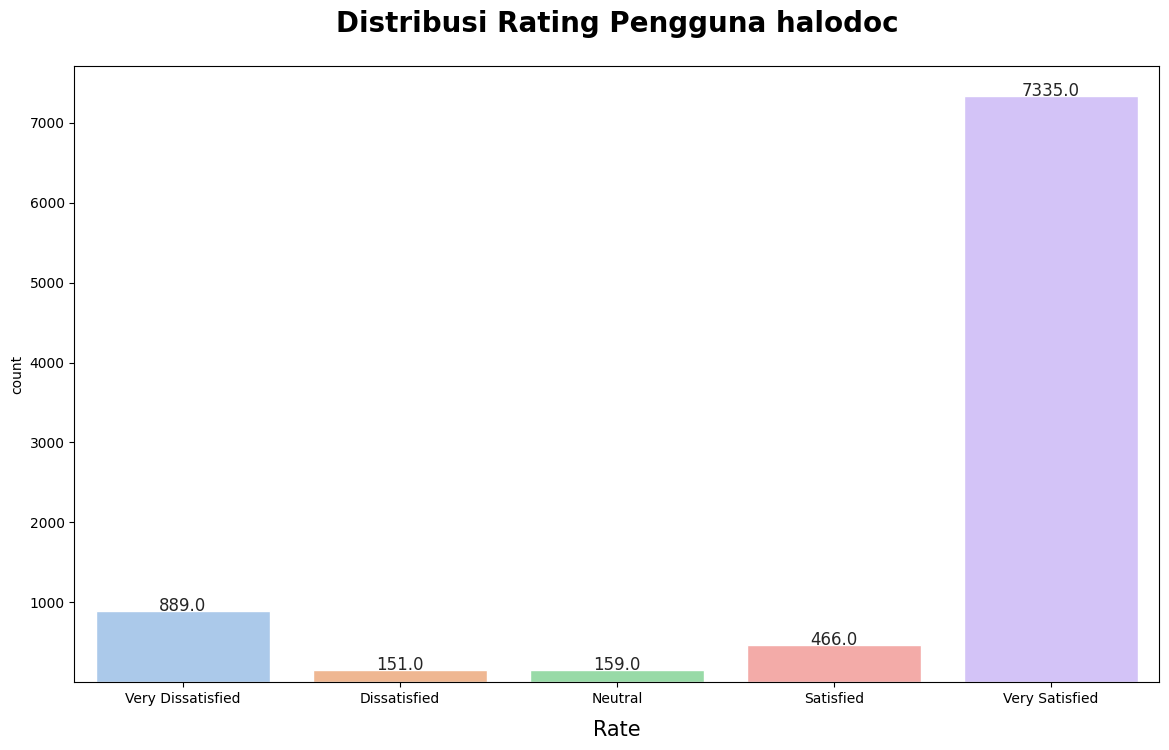

In [33]:
# visualisasi bar chart untuk melihat jumlah rating pengguna halodoc
fig, ax = plt.subplots(figsize=(14,8))
position = (0,1,2,3,4)
labels = ("Very Dissatisfied","Dissatisfied","Neutral","Satisfied","Very Satisfied")

ax = sns.set_style('whitegrid')
ax = sns.countplot(x="score", data=halodoc, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,
             rect.get_height()+ 3.25,rect.get_height(),
             horizontalalignment='center', fontsize = 12)

plt.title('Distribusi Rating Pengguna halodoc', fontsize=20, fontweight='bold', pad=25)
plt.xlabel('Rate', fontsize=15, labelpad=10)
plt.xticks(position, labels)
plt.ylim(1)
plt.show()

In [34]:
grouped_data = halodoc.groupby(['score', 'year']).size().reset_index(name='count')

In [35]:
label_mapping = {
    "Very Dissatisfied": 0,
    "Dissatisfied": 1,
    "Neutral": 2,
    "Satisfied": 3,
    "Very Satisfied": 4
}

grouped_data['score'] = grouped_data['score'].map(label_mapping)

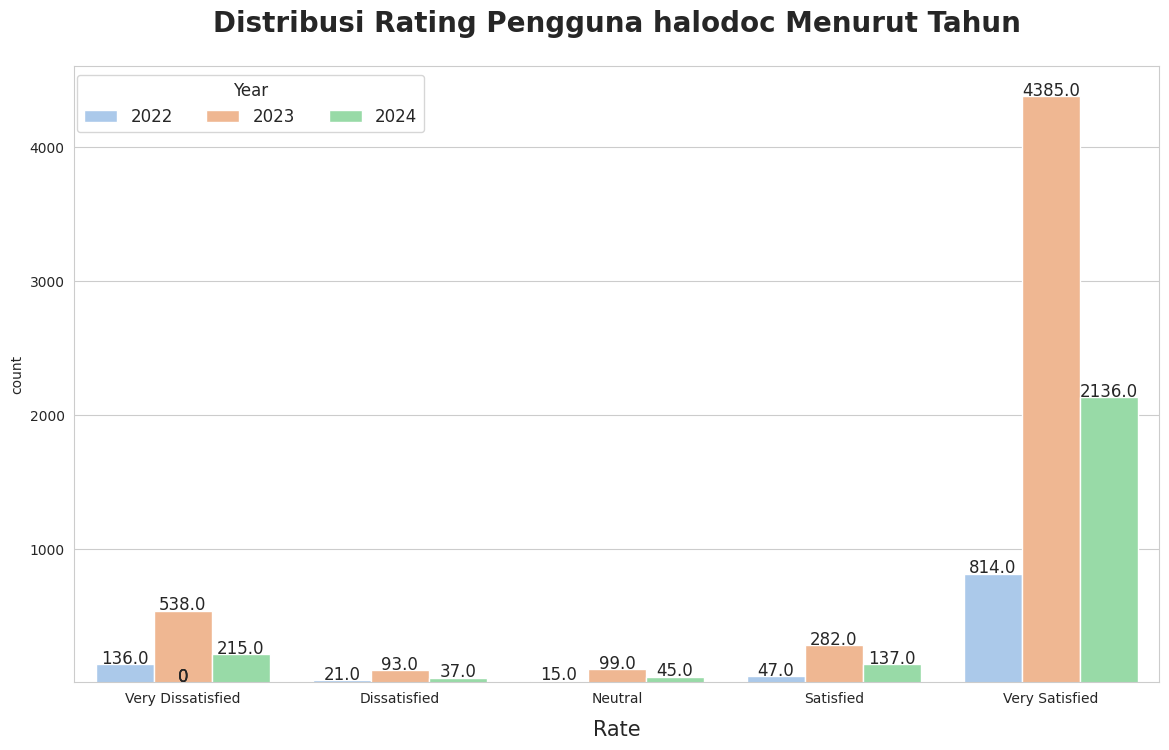

In [36]:
# mem-breakdown bar chart pada sel sebelumnya berdasarkan tahun
fig, ax = plt.subplots(figsize=(14,8))
position = (0,1,2,3,4)
labels = ("Very Dissatisfied","Dissatisfied","Neutral","Satisfied","Very Satisfied")

ax = sns.set_style('whitegrid')
ax = sns.countplot(x="score", hue="year", data=halodoc, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,
             rect.get_height()+ 3.25,rect.get_height(),
             horizontalalignment='center', fontsize = 12)

plt.legend(fontsize=12, bbox_to_anchor=(0.33,1), ncol = 3, title="Year", title_fontsize=12)
plt.title('Distribusi Rating Pengguna halodoc Menurut Tahun', fontsize=20,
          fontweight='bold', pad=25)
plt.xlabel('Rate', fontsize=15, labelpad=10)
plt.xticks(position, labels)
plt.ylim(1)
plt.show()

## Delete unnecessary columns and does not provide any information.

In [37]:
halodoc.drop(['reviewId','userName','userImage','score','thumbsUpCount','date','year','month'], axis=1, inplace=True)

In [38]:
print('Ringkasan dataset setelah dilakukan manipulasi data', halodoc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   content       9000 non-null   object
 1   replyContent  9000 non-null   object
 2   repliedAt     9000 non-null   object
dtypes: object(3)
memory usage: 211.1+ KB
Ringkasan dataset setelah dilakukan manipulasi data None


In [39]:
halodoc.head()

,content,replyContent,repliedAt
0,Pelayanan sangat bagus.,Hai Liana! Terima kasih sudah menggunakan Halo...,2024-06-06 00:21:40
1,Ini pesen obat lewat apotek halodoc terkonfirm...,Hai MELANI PUTRI! Mohon maaf atas ketidaknyama...,2024-06-06 00:05:32
2,ok,Hai Rama Rama! Terima kasih sudah menggunakan ...,2024-06-06 00:05:50
3,Jhoz,Hai premm Fals! Terima kasih sudah menggunakan...,2024-06-06 00:05:44
4,Benar² rekomendasi,Hai Novika Ayu Wananda! Terima kasih sudah men...,2024-06-05 16:39:50


## Delete Duplicate Data that contain in the content column

In [40]:
# menghitung jumlah ulasan yang duplikasi
halodoc.duplicated().sum()

0

In [41]:
# menghapus duplikasi ulasan agar nantinya model tidak mempelajari kata yang sama secara berulang
halodoc.drop_duplicates(inplace=True)

In [42]:
# mengecek kembali jumlah duplikat setelah di hapus
halodoc.duplicated().sum()

0

Ulasan sudah bersih dari duplikasi dan siap untuk melanjutkan proses, yaitu persiapan data untuk membersihkan ulasan dari emoji, tanda baca, ketidakserasian jenis huruf, pengulangan kata, normalisasi, dll.



---



# Data Preparation

## Case Folding

In [43]:
# merubah jenis huruf menjadi huruf kecil
def lowercase(review_text):
  low = review_text.lower()
  return low

halodoc['clean_review'] = halodoc['content'].apply(lambda low:lowercase(str(low)))

In [44]:
halodoc.head()

,content,replyContent,repliedAt,clean_review
0,Pelayanan sangat bagus.,Hai Liana! Terima kasih sudah menggunakan Halo...,2024-06-06 00:21:40,pelayanan sangat bagus.
1,Ini pesen obat lewat apotek halodoc terkonfirm...,Hai MELANI PUTRI! Mohon maaf atas ketidaknyama...,2024-06-06 00:05:32,ini pesen obat lewat apotek halodoc terkonfirm...
2,ok,Hai Rama Rama! Terima kasih sudah menggunakan ...,2024-06-06 00:05:50,ok
3,Jhoz,Hai premm Fals! Terima kasih sudah menggunakan...,2024-06-06 00:05:44,jhoz
4,Benar² rekomendasi,Hai Novika Ayu Wananda! Terima kasih sudah men...,2024-06-05 16:39:50,benar² rekomendasi


# Cleaning Data

## Remove the emoji of the text.

In [45]:
# menghapus emoji menggunakan regex dan nilai unicode dari emoji

def remove_emoji(review_text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', review_text)

halodoc['clean_review'] = halodoc['clean_review'].apply(lambda emoji: remove_emoji(emoji))

## remove hashtag

In [46]:
# menghapus hashtag dari ulasan yang biasanya digunakan oleh pengguna untuk memberikan tagar
# terkait topik dari ulasan yang diutarakan

def remove_hashtag(review_text, default_replace=""):
  hashtag = re.sub(r'#\w+', default_replace, review_text)
  return hashtag

halodoc['clean_review'] = halodoc['clean_review'].apply(lambda hashtag: remove_hashtag(hashtag))

## remove punctuation and number

In [47]:
# menghapus angka dalam ulasan

def remove_number(review_text, default_replace=" "):
  num = re.sub(r'\d+', default_replace, review_text)
  return num

halodoc['clean_review'] = halodoc['clean_review'].apply(lambda num: remove_number(num))

In [48]:
# menghapus tanda baca

def remove_punctuation(review_text, default_text=" "):
  list_punct = string.punctuation
  delete_punct = str.maketrans(list_punct,' '*len(list_punct))
  new_review = ' '.join(review_text.translate(delete_punct).split())

  return new_review

halodoc['clean_review'] = halodoc['clean_review'].apply(lambda punct: remove_punctuation(punct))

In [49]:
# menghapus superscript dalam ulasan yang biasa digunakan oleh pengguna dalam mengulangi kata

def remove_superscript(review_text):
  number = re.compile("["u"\U00002070"
                      u"\U000000B9"
                      u"\U000000B2-\U000000B3"
                      u"\U00002074-\U00002079"
                      u"\U0000207A-\U0000207E"
                      u"U0000200D"
                      "]+", flags=re.UNICODE)
  return number.sub(r'', review_text)

halodoc['clean_review'] = halodoc['clean_review'].apply(lambda num: remove_superscript(num))

## remove words repetition

In [50]:
# melakukan pembatasan jumlah huruf menjadi dua untuk mengembalikan kata ke bentuk awal
# dan menghindari terjadinya kata ganda yang memiliki arti sama tetapi berbeda penulisan

def word_repetition(review_text):
  review = re.sub(r'(.)\1+', r'\1\1', review_text)
  return review

halodoc['clean_review'] = halodoc['clean_review'].apply(lambda word: word_repetition(word))

In [51]:
# melakukan pembatasan kata berulang menjadi satu kali, seperti suka suka -> suka

def repetition(review_text):
  repeat = re.sub(r'\b(\w+)(?:\W\1\b)+', r'\1',review_text, flags=re.IGNORECASE)
  return repeat

halodoc['clean_review'] = halodoc['clean_review'].apply(lambda word: repetition(word))

## remove whitespaces

Meskipun telah dibersihkan, ulasan masih bisa mengandung spasi ganda yang dapat berasal dari pengguna ketika mengetik ataupun ketika melakukan pembersihan ulasan. Maka dari itu, menghapus spasi ganda diperlukan.

In [52]:
# menghapus spasi berlebih dalam ulasan

def remove_extra_whitespaces(review_text):
  review = re.sub(r'\s+',' ', review_text)
  return review

halodoc['clean_review'] = halodoc['clean_review'].apply(lambda extra_spaces: remove_extra_whitespaces(extra_spaces))

## remove another words which doesn't give any information

Ulasan pengguna tidak hanya berisi kata yang bisa ditafsirkan atau dimengerti oleh manusia. Ada kalanya pengguna memberikan informasi berupa kode voucher, ketawa, atau kata abstrak yang tidak bisa/sulit diterjemahkan. Dimana kata tersebut bisa membingungkan orang yang menganalisisnya karena tidak tahu arti dari kata tersebut. Maka dari itu, saya melakukan pembersihan secara mendalam dengan menghapus seluruh kata abstrak yang nantinya tidak memberikan informasi apapun kepada model dan hanya menghambat kinerja model.

In [53]:
bannedword = ['uqjy', 'dehdje', 'jwdnmb', 'wxvlezuvws', 'ircel', 'swjjw', 'dmv',
         'dxrgz','qjtajuq','zzhwntdft','xywrfw' ,'fztnmdrrduy' ,'xsezuz',
         'kbyv', 'iyyveyzqkdgm', 'arlrmdjy', 'sfarif', 'sfomar',
         'syantienurxhalodoc', 'ghinaxhalodoc', 'nzxx', 'mtsco','wkwk',
         'wkwkw','wkwkwk','hihi','hihihii','hihihi','hehehe','hehehehe','hehe',
         'huhu','huhuu','ancok','guak','cokcok','hhmm','annya','huftt']

re_banned_words = re.compile(r"\b(" + "|".join(bannedword) + ")\\W", re.I)

def RemoveBannedWords(toPrint):
    global re_banned_words
    return re_banned_words.sub("", toPrint)

halodoc['clean_review'] = halodoc['clean_review'].apply(lambda banned:RemoveBannedWords(banned))

In [54]:
halodoc.head()

,content,replyContent,repliedAt,clean_review
0,Pelayanan sangat bagus.,Hai Liana! Terima kasih sudah menggunakan Halo...,2024-06-06 00:21:40,pelayanan sangat bagus
1,Ini pesen obat lewat apotek halodoc terkonfirm...,Hai MELANI PUTRI! Mohon maaf atas ketidaknyama...,2024-06-06 00:05:32,ini pesen obat lewat apotek halodoc terkonfirm...
2,ok,Hai Rama Rama! Terima kasih sudah menggunakan ...,2024-06-06 00:05:50,ok
3,Jhoz,Hai premm Fals! Terima kasih sudah menggunakan...,2024-06-06 00:05:44,jhoz
4,Benar² rekomendasi,Hai Novika Ayu Wananda! Terima kasih sudah men...,2024-06-05 16:39:50,benar rekomendasi


## change slang into standard terms (Normalization Phase)

Menormalisasikan kata singkat dan tidak baku menjadi kata baku sesuai dengan KBBI.

In [55]:
slangs = open('slangs.txt',"r",encoding="utf-8", errors='replace')

In [56]:
clear_slangs= []
for newlines in slangs:
  strip_re = newlines.strip("\n")
  split = re.split(r'[:]',strip_re)
  clear_slangs.append(split)

print(clear_slangs)

[['& ', ' dan'], ['dr ', ' dari'], ['abis ', ' habis'], ['ad ', ' ada'], ['alhmdulillah ', ' alhamdulillah'], ['alhamdulilah ', ' alhamdulillah'], ['alhamdulillaah ', ' alhamdulillah'], ['alhamdulillah ', ' alhamdulillah'], ['adminnya ', ' admin nya'], ['account ', ' akun'], ['asiikk ', ' asyik'], ['alpukatnya ', ' alpukat nya'], ['amin ', ' aamiin'], ['aplikasinnya ', ' aplikasi nya'], ['aplikasinya ', ' aplikasi nya'], ['awesome ', ' luar biasa'], ['asyilk ', ' asyik'], ['antaran ', ' pengantaran'], ['apus ', ' hapus'], ['ampe ', ' sampai'], ['almt ', ' alamat'], ['almat ', ' alamat'], ['alamt ', ' alamat'], ['almtnya ', ' alamatnya'], ['apknya ', ' aplikasinya'], ['antri ', ' antre'], ['adl ', ' adalah'], ['awalnnya ', ' awalnya'], ['asem ', ' asam'], ['alumunium ', ' aluminium'], ['abis ', ' habis'], ['areaku ', ' area saya'], ['alpulat ', ' alpukat'], ['adlah ', ' adalah'], ['applikasi ', ' aplikasi'], ['apps ', ' aplikasi'], ['app ', ' aplikasi'], ['afordable ', ' affordable'], [

In [57]:
slangs = [[k.strip(), v.strip()] for k,v in clear_slangs]
dict_slangs = {key:values for key,values in slangs}
dict_slangs

{'&': 'dan',
 'dr': 'dari',
 'abis': 'habis',
 'ad': 'ada',
 'alhmdulillah': 'alhamdulillah',
 'alhamdulilah': 'alhamdulillah',
 'alhamdulillaah': 'alhamdulillah',
 'alhamdulillah': 'alhamdulillah',
 'adminnya': 'admin nya',
 'account': 'akun',
 'asiikk': 'asyik',
 'alpukatnya': 'alpukat nya',
 'amin': 'aamiin',
 'aplikasinnya': 'aplikasi nya',
 'aplikasinya': 'aplikasi nya',
 'awesome': 'luar biasa',
 'asyilk': 'asyik',
 'antaran': 'pengantaran',
 'apus': 'hapus',
 'ampe': 'sampai',
 'almt': 'alamat',
 'almat': 'alamat',
 'alamt': 'alamat',
 'almtnya': 'alamatnya',
 'apknya': 'aplikasinya',
 'antri': 'antre',
 'adl': 'adalah',
 'awalnnya': 'awalnya',
 'asem': 'asam',
 'alumunium': 'aluminium',
 'areaku': 'area saya',
 'alpulat': 'alpukat',
 'adlah': 'adalah',
 'applikasi': 'aplikasi',
 'apps': 'aplikasi',
 'app': 'aplikasi',
 'afordable': 'affordable',
 'agent': 'agen',
 'agus': 'hangus',
 'apk': 'aplikasi',
 'appsnya': 'aplikasinya',
 'aah': 'ah',
 'apakh': 'apakah',
 'apalgi': 'apal

In [58]:
clean_text = []
for review in halodoc['clean_review']:
  wordlist = TextBlob(review).words
  for k,v in enumerate(wordlist):
    if v in dict_slangs.keys():
      wordlist[k] = dict_slangs[v]
  clean_text.append(' '.join(wordlist))

In [59]:
clean_text

['pelayanan sangat bagus',
 'ini pesan obat lewat apotek halodoc terkonfirmasi terus tidak di kirim mohon kembalikan uang saya',
 'oke',
 'jhoz',
 'benar rekomendasi',
 'aplikasi ini sangat membantu',
 'kompeten',
 'bagus dan cepat sampai barangnya',
 'dokternya ramah',
 'mateb banget konsul nya ramah juga',
 'puas pelayanannya bagus',
 'sangat membantu',
 'cukup puas',
 'baik sekali responsif lalu dokternya juga ramah penanganannya sangat excelent',
 'dokter nya cepat menanggapi keluhan pasien aplikasi ini sangat membantu ketika kita dalam keadaan panik akan kesehatan',
 'suka banget konsul disini tuhh fast respons',
 'bagus pelayananny bagus dokternya ramahh tidak lambat respons',
 'bagus',
 'puas dokter sangat ramah dan membantu semoga jerawat saya lekas sembuh',
 'bagus',
 'mantull',
 'baik',
 'aplikasi yang bagus sangat membantu',
 'baus banget bisa konsul dengan dokter tanpa kontak fisik dan sangat memudahkan pasienn',
 'bagus',
 'membantu sekali',
 'oke banget',
 'ini suka ada b

In [60]:
halodoc['normalization'] = clean_text

In [61]:
halodoc.head()

,content,replyContent,repliedAt,clean_review,normalization
0,Pelayanan sangat bagus.,Hai Liana! Terima kasih sudah menggunakan Halo...,2024-06-06 00:21:40,pelayanan sangat bagus,pelayanan sangat bagus
1,Ini pesen obat lewat apotek halodoc terkonfirm...,Hai MELANI PUTRI! Mohon maaf atas ketidaknyama...,2024-06-06 00:05:32,ini pesen obat lewat apotek halodoc terkonfirm...,ini pesan obat lewat apotek halodoc terkonfirm...
2,ok,Hai Rama Rama! Terima kasih sudah menggunakan ...,2024-06-06 00:05:50,ok,oke
3,Jhoz,Hai premm Fals! Terima kasih sudah menggunakan...,2024-06-06 00:05:44,jhoz,jhoz
4,Benar² rekomendasi,Hai Novika Ayu Wananda! Terima kasih sudah men...,2024-06-05 16:39:50,benar rekomendasi,benar rekomendasi


## delete words containing 3 letters

Setelah melakukan analisis terhadap ulasan yang telah bersih, menghapus kata abstrak tidak cukup untuk membuat ulasan bersih karena masih ditemukan beberapa kata yang tidak sesuai dan membingungkan. Oleh karena itu, saya melakukan penghapusan kata yang terdiri dari 3 huruf, seperti oh, iya, ini, itu, dll, dan tidak memberikan informasi penting bagi model saat melakukan prediksi.

In [62]:
def remove_small_words(text):
  text = re.sub(r'\b\w{1,3}\b','',text)
  return text

In [63]:
halodoc['final_text'] = halodoc['normalization'].apply(lambda remove: remove_small_words(str(remove)))

# Word Tokenizing

In [64]:
def word_token(review_text):
  return word_tokenize(review_text)

In [65]:
halodoc['token'] = halodoc['final_text'].apply(lambda tokenize:word_token(str(tokenize)))

In [66]:
halodoc.head()

,content,replyContent,repliedAt,clean_review,normalization,final_text,token
0,Pelayanan sangat bagus.,Hai Liana! Terima kasih sudah menggunakan Halo...,2024-06-06 00:21:40,pelayanan sangat bagus,pelayanan sangat bagus,pelayanan sangat bagus,"[pelayanan, sangat, bagus]"
1,Ini pesen obat lewat apotek halodoc terkonfirm...,Hai MELANI PUTRI! Mohon maaf atas ketidaknyama...,2024-06-06 00:05:32,ini pesen obat lewat apotek halodoc terkonfirm...,ini pesan obat lewat apotek halodoc terkonfirm...,pesan obat lewat apotek halodoc terkonfirmasi...,"[pesan, obat, lewat, apotek, halodoc, terkonfi..."
2,ok,Hai Rama Rama! Terima kasih sudah menggunakan ...,2024-06-06 00:05:50,ok,oke,,[]
3,Jhoz,Hai premm Fals! Terima kasih sudah menggunakan...,2024-06-06 00:05:44,jhoz,jhoz,jhoz,[jhoz]
4,Benar² rekomendasi,Hai Novika Ayu Wananda! Terima kasih sudah men...,2024-06-05 16:39:50,benar rekomendasi,benar rekomendasi,benar rekomendasi,"[benar, rekomendasi]"


# Wordcloud Visualization

In [67]:
review_all = []

for review in halodoc['final_text']:
  text = review.split()
  for token_review in text:
    print(token_review)
    review_all.append(token_review)

Streaming output truncated to the last 5000 lines.
obatnya
lama
banget
dikemasnya
harusnya
ongkos
kirim
bayar
gercepin
dong
sudah
hampir
seminggu
belum
kirim
coba
yang
dokter
hewannya
juga
please
ternyata
banyak
komplain
jadi
tidak
nyaman
registrasi
pesej
obat
saja
susah
verifikasi
data
gagal
terus
buat
aplikasi
bagus
alhamdulillah
membantu
banget
dengan
adanya
aplikasi
untuk
saya
yang
papua
respons
dokter
pengirimannya
cepat
sekali
saya
pesan
subuh
datang
obatnya
mantap
keren
selalu
sedia
kapan
sjaa
heran
sudah
ganti
sesuai
profil
tetap
selalu
kena
error
obat
tidak
sesuai
dengan
profile
meresahkan
terima
kasih
atas
aplikasi
halodoc
mempermudah
kita
untuk
konsultasi
resep
obat
rekomendasi
baik
dokter
jaka
sangat
komunikatif
dengan
halodoc
semua
jadi
lebih
mudah
terima
kasih
juga
halodoc
fast
respons
mantap
bermanfaat
banyak
membantu
tingkatkan
kualitas
respons
dokter
cepat
terima
kasih
sangat
membantu
dokternya
pada
tidak
ramah
yang
mengakhiri
sesi
secara
sepihak
padahal
jawaban
saya
b

In [68]:
# menampilkan kata dengan jumlah kemunculan yang paling dibahas oleh pengguna

freq_dist = FreqDist(review_all)
print("how many frequency distribution samples from an entire halodoc's review")
freq_dist

how many frequency distribution samples from an entire halodoc's review


FreqDist({'sangat': 3283, 'membantu': 2949, 'tidak': 1798, 'dokter': 1463, 'yang': 1338, 'saya': 1218, 'bagus': 1151, 'aplikasi': 1137, 'cepat': 1005, 'bisa': 985, ...})

In [69]:
# menampilkan 500 kata yang paling sering muncul

common_review = freq_dist.most_common(500)
print(common_review)

[('sangat', 3283), ('membantu', 2949), ('tidak', 1798), ('dokter', 1463), ('yang', 1338), ('saya', 1218), ('bagus', 1151), ('aplikasi', 1137), ('cepat', 1005), ('bisa', 985), ('kasih', 960), ('halodoc', 908), ('terima', 904), ('obat', 894), ('dokternya', 766), ('sudah', 751), ('dengan', 713), ('sekali', 710), ('untuk', 688), ('konsultasi', 678), ('banget', 654), ('baik', 622), ('ramah', 576), ('respons', 488), ('juga', 477), ('mantap', 463), ('dari', 445), ('tapi', 413), ('konsul', 365), ('lagi', 350), ('pelayanan', 342), ('mudah', 339), ('kalau', 316), ('saja', 315), ('bayar', 293), ('sama', 268), ('karena', 268), ('pakai', 265), ('sakit', 264), ('langsung', 263), ('chat', 261), ('jadi', 259), ('harus', 257), ('sampai', 255), ('resep', 246), ('buat', 235), ('saat', 235), ('banyak', 211), ('semoga', 210), ('lebih', 206), ('pesan', 205), ('rumah', 204), ('lama', 193), ('bahkan', 192), ('selalu', 189), ('pengiriman', 187), ('dalam', 185), ('waktu', 183), ('bermanfaat', 182), ('kita', 178

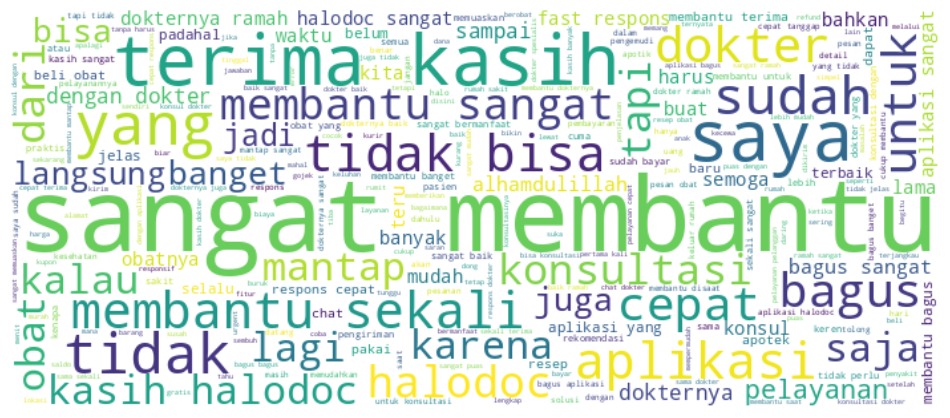

In [70]:
# membuat visualisasi WordCloud

join_review = ' '.join(review_all)

w_cloud = WordCloud(background_color="white",
                    width=700, height=300, max_font_size=120,
                    max_words=500, contour_color='blue',
                    contour_width=2).generate(str(join_review))

# plot wordcloud
plt.figure(figsize=(12,12))
plt.imshow(w_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [71]:
# memasukkan 500 sampel kata beserta jumlah kemunculan ke dalam dataframe

most_freq_df = pd.DataFrame(common_review, columns=['words','count'])
most_freq_df.sort_values(by='count', ascending=False)

,words,count
0,sangat,3283
1,membantu,2949
2,tidak,1798
3,dokter,1463
4,yang,1338
...,...,...
478,google,15
477,jadinya,15
476,riwayat,15
475,berhasil,15


In [72]:
# mengurutkan kata sampel berdasarkan jumlah kemunculan yang diurutkan secara descending
# kemudian mengambil 15 kata sampel

most_freq_df.sort_values(by='count', ascending=False)
top15 = most_freq_df.iloc[:15]

<ipython-input-73-01404f08f827>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='words', y='count', data=top15, palette = 'Set2')


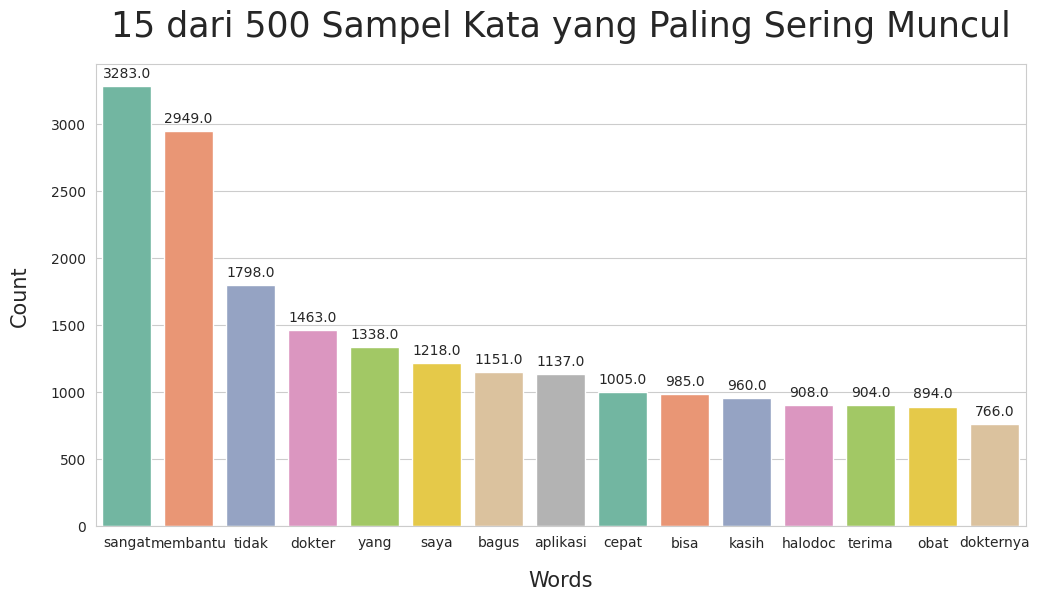

In [73]:
# membuat visualisasi 15 sampel kata yang paling sering dibicarakan oleh pengguna

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')

ax = sns.barplot(x='words', y='count', data=top15, palette = 'Set2')
for annotate in ax.patches:
  ax.annotate(format(annotate.get_height(), '.1f'),
              (annotate.get_x() + annotate.get_width()/2.,
               annotate.get_height()), ha = 'center', va='center', xytext=(0,9),
               textcoords = 'offset points')
plt.title("15 dari 500 Sampel Kata yang Paling Sering Muncul", fontsize=25, pad=20)
plt.xlabel('Words', fontsize=15, labelpad=15)
plt.ylabel('Count', fontsize=15, labelpad=15)
plt.show()

# Remove Stopword in bahasa

In [74]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('popular')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Down

True

In [75]:
# menampilkan kata stopwords bahasa indonesia
indonesian_stop = stopwords.words('indonesian')

# menghitung jumlah kata stopwords bahasa indonesia
print('length of indonesian stopwords:', len(indonesian_stop))

length of indonesian stopwords: 758


In [76]:
# memasukkan stopwords bahasa indonesia ke dalam dataframe

stopwords_indo = pd.DataFrame(indonesian_stop, columns=['stopwords_indonenesia'])

In [77]:
# menyimpan stopwords bahasa indonesia ke dalam format xlsx
stopwords_indo.to_excel('stopwords_indonesian.xlsx', index=False)

## function that used to remove stopwords

In [78]:
def remove_stopwords(review_text, indo_stopwords):
  tokenize = []
  for token in review_text:
    if token not in indo_stopwords:
      tokenize.append(token)

  return tokenize

halodoc['stop_review'] = halodoc['token'].apply(lambda stop: remove_stopwords(stop, indonesian_stop))

In [79]:
halodoc.head()

,content,replyContent,repliedAt,clean_review,normalization,final_text,token,stop_review
0,Pelayanan sangat bagus.,Hai Liana! Terima kasih sudah menggunakan Halo...,2024-06-06 00:21:40,pelayanan sangat bagus,pelayanan sangat bagus,pelayanan sangat bagus,"[pelayanan, sangat, bagus]","[pelayanan, bagus]"
1,Ini pesen obat lewat apotek halodoc terkonfirm...,Hai MELANI PUTRI! Mohon maaf atas ketidaknyama...,2024-06-06 00:05:32,ini pesen obat lewat apotek halodoc terkonfirm...,ini pesan obat lewat apotek halodoc terkonfirm...,pesan obat lewat apotek halodoc terkonfirmasi...,"[pesan, obat, lewat, apotek, halodoc, terkonfi...","[pesan, obat, apotek, halodoc, terkonfirmasi, ..."
2,ok,Hai Rama Rama! Terima kasih sudah menggunakan ...,2024-06-06 00:05:50,ok,oke,,[],[]
3,Jhoz,Hai premm Fals! Terima kasih sudah menggunakan...,2024-06-06 00:05:44,jhoz,jhoz,jhoz,[jhoz],[jhoz]
4,Benar² rekomendasi,Hai Novika Ayu Wananda! Terima kasih sudah men...,2024-06-05 16:39:50,benar rekomendasi,benar rekomendasi,benar rekomendasi,"[benar, rekomendasi]",[rekomendasi]


# Text Normalization
## Stemming Normalization

In [80]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [81]:
def back_to_root(review_text):
  stop_token = ' '.join(review_text)
  stem = StemmerFactory()
  create_stem = stem.create_stemmer()
  result_stem = create_stem.stem(stop_token)
  return result_stem

halodoc['stem_review'] = halodoc['stop_review'].apply(lambda stem:back_to_root(stem))

In [82]:
halodoc.head()

,content,replyContent,repliedAt,clean_review,normalization,final_text,token,stop_review,stem_review
0,Pelayanan sangat bagus.,Hai Liana! Terima kasih sudah menggunakan Halo...,2024-06-06 00:21:40,pelayanan sangat bagus,pelayanan sangat bagus,pelayanan sangat bagus,"[pelayanan, sangat, bagus]","[pelayanan, bagus]",layan bagus
1,Ini pesen obat lewat apotek halodoc terkonfirm...,Hai MELANI PUTRI! Mohon maaf atas ketidaknyama...,2024-06-06 00:05:32,ini pesen obat lewat apotek halodoc terkonfirm...,ini pesan obat lewat apotek halodoc terkonfirm...,pesan obat lewat apotek halodoc terkonfirmasi...,"[pesan, obat, lewat, apotek, halodoc, terkonfi...","[pesan, obat, apotek, halodoc, terkonfirmasi, ...",pesan obat apotek halodoc konfirmasi kirim moh...
2,ok,Hai Rama Rama! Terima kasih sudah menggunakan ...,2024-06-06 00:05:50,ok,oke,,[],[],
3,Jhoz,Hai premm Fals! Terima kasih sudah menggunakan...,2024-06-06 00:05:44,jhoz,jhoz,jhoz,[jhoz],[jhoz],jhoz
4,Benar² rekomendasi,Hai Novika Ayu Wananda! Terima kasih sudah men...,2024-06-05 16:39:50,benar rekomendasi,benar rekomendasi,benar rekomendasi,"[benar, rekomendasi]",[rekomendasi],rekomendasi


# Data Labeling

## Read the positive and negative lexicon

In [83]:
lexicon_positive = dict()
import csv
with open('lexicon_positive_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon_negative_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_negative[row[0]] = int(row[1])

## Create a function named sentiment_analysis_lexicon_indonesia which contains a for loop and if conditions to label each review

Ulasan diberi score terlebih dahulu dengan menyesuaikan dengan bobot kata yang terdapat di kamus. +5 untuk kata positif dan -5 untuk negatif. Setelah itu, bobot ulasan dijumlahkan kemudian di kelompokkan menjadi sentimen positif, negatif, dan netral. netral ini diartikan sebagai hasil kalkulasi ulasan bernilai 0. Karena fokus analisis ini hanya sentimen positif dan negatif, maka ulasan yang mengandung sentimen netral nanti akan di hilangkan.

In [84]:
def sentiment_analysis_lexicon_indonesia(text):
  score = 0
  for word_pos in text:
    if (word_pos in lexicon_positive):
      score = score + lexicon_positive[word_pos]
  for word_neg in text:
    if (word_neg in lexicon_negative):
      score = score + lexicon_negative[word_neg]
  polarity=''
  if (score > 0):
    polarity = 'positif'
  elif (score < 0):
    polarity = 'negatif'
  else:
    polarity = 'netral'

  return score, polarity

### Conduct functional tests on dummy sentences.

In [85]:
string = "Keren sekali, sangat membantu"
string = string.split()
hasil = sentiment_analysis_lexicon_indonesia(string)
hasil

(-2, 'negatif')

### Separate the sentences in the stem_review column and then apply the sentiment_analysis_lexicon_indonesia function to that column

In [86]:
halodoc['prepos_text'] = halodoc.stem_review.str.split()

In [87]:
results = halodoc['prepos_text'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
halodoc['polarity_score'] = results[0]
halodoc['polarity'] = results[1]
print(halodoc['polarity'].value_counts())

polarity
negatif    3975
positif    3800
netral     1225
Name: count, dtype: int64


In [88]:
# mengonversikan whitespaces menjadi np.nan kemudian menghapusnya menggunakan fungsi dropna
halodoc = halodoc.replace('',np.nan, regex=True)
halodoc = halodoc.dropna()

In [89]:
# reset index tabel agar urutan menjadi penomoran menjadi lebih rapih
halodoc = halodoc.reset_index(drop=True)

In [90]:
print(halodoc['polarity'].value_counts())

polarity
negatif    3975
positif    3800
netral      786
Name: count, dtype: int64


In [91]:
halodoc[(halodoc['polarity']=='netral')]

,content,replyContent,repliedAt,clean_review,normalization,final_text,token,stop_review,stem_review,prepos_text,polarity_score,polarity
2,Jhoz,Hai premm Fals! Terima kasih sudah menggunakan...,2024-06-06 00:05:44,jhoz,jhoz,jhoz,[jhoz],[jhoz],jhoz,[jhoz],0,netral
3,Benar² rekomendasi,Hai Novika Ayu Wananda! Terima kasih sudah men...,2024-06-05 16:39:50,benar rekomendasi,benar rekomendasi,benar rekomendasi,"[benar, rekomendasi]",[rekomendasi],rekomendasi,[rekomendasi],0,netral
5,Kompeten,Hai Ilham Riyadi! Terima kasih sudah menggunak...,2024-06-05 16:39:28,kompeten,kompeten,kompeten,[kompeten],[kompeten],kompeten,[kompeten],0,netral
15,"baguss pelayananny bagus dokternya ramahh, gak...",Hai Sayarinnduu! Terima kasih sudah menggunaka...,2024-06-05 05:08:25,baguss pelayananny bagus dokternya ramahh gak ...,bagus pelayananny bagus dokternya ramahh tidak...,bagus pelayananny bagus dokternya ramahh tidak...,"[bagus, pelayananny, bagus, dokternya, ramahh,...","[bagus, pelayananny, bagus, dokternya, ramahh,...",bagus pelayananny bagus dokter ramahh lambat r...,"[bagus, pelayananny, bagus, dokter, ramahh, la...",0,netral
19,Mantulll,Hai Dakrip “Pcs”! Terima kasih sudah menggunak...,2024-06-04 16:05:48,mantull,mantull,mantull,[mantull],[mantull],mantull,[mantull],0,netral
...,...,...,...,...,...,...,...,...,...,...,...,...
8510,Sangat baik dokterny,Hai Yula Gani! Terima kasih sudah menggunakan ...,2022-11-02 10:45:28,sangat baik dokterny,sangat baik dokterny,sangat baik dokterny,"[sangat, baik, dokterny]",[dokterny],dokterny,[dokterny],0,netral
8521,Lovve,Hai indah wulandari! Terima kasih sudah menggu...,2022-11-01 15:08:11,lovve,lovve,lovve,[lovve],[lovve],lovve,[lovve],0,netral
8527,Obat yg dipesan tidak sesuai instrusi catatan ...,Hai Miqdad Arromy! Mohon maaf atas ketidaknyam...,2022-11-01 10:12:26,obat yg dipesan tidak sesuai instrusi catatan ...,obat yang dipesan tidak sesuai instrusi catata...,obat yang dipesan tidak sesuai instrusi catata...,"[obat, yang, dipesan, tidak, sesuai, instrusi,...","[obat, dipesan, sesuai, instrusi, catatan]",obat pes sesuai instrusi catat,"[obat, pes, sesuai, instrusi, catat]",0,netral
8529,Okke deh..,Hai Vivi nurul shovia! Terima kasih sudah meng...,2022-11-01 09:36:53,okke deh,okke deh,okke,[okke],[okke],okke,[okke],0,netral


### Delete review with neutral sentiment

In [92]:
# menghapus content yang bersentimen netral karena tujuan dari penelitian ini hanya menggunakan 2 sentimen yaitu positif dan negatif
halodoc = halodoc.drop(halodoc[halodoc['polarity'] == 'netral'].index)
halodoc = halodoc.reset_index(drop=True)

In [93]:
halodoc.head(20)

,content,replyContent,repliedAt,clean_review,normalization,final_text,token,stop_review,stem_review,prepos_text,polarity_score,polarity
0,Pelayanan sangat bagus.,Hai Liana! Terima kasih sudah menggunakan Halo...,2024-06-06 00:21:40,pelayanan sangat bagus,pelayanan sangat bagus,pelayanan sangat bagus,"[pelayanan, sangat, bagus]","[pelayanan, bagus]",layan bagus,"[layan, bagus]",-2,negatif
1,Ini pesen obat lewat apotek halodoc terkonfirm...,Hai MELANI PUTRI! Mohon maaf atas ketidaknyama...,2024-06-06 00:05:32,ini pesen obat lewat apotek halodoc terkonfirm...,ini pesan obat lewat apotek halodoc terkonfirm...,pesan obat lewat apotek halodoc terkonfirmasi...,"[pesan, obat, lewat, apotek, halodoc, terkonfi...","[pesan, obat, apotek, halodoc, terkonfirmasi, ...",pesan obat apotek halodoc konfirmasi kirim moh...,"[pesan, obat, apotek, halodoc, konfirmasi, kir...",1,positif
2,Aplikasi ini sangat membantu,Hai ayu budi kartika! Terima kasih sudah mengg...,2024-06-05 16:39:39,aplikasi ini sangat membantu,aplikasi ini sangat membantu,aplikasi sangat membantu,"[aplikasi, sangat, membantu]","[aplikasi, membantu]",aplikasi bantu,"[aplikasi, bantu]",-5,negatif
3,bagus dan cepat sampai barangnya,Hai Andryan! Terima kasih sudah menggunakan Ha...,2024-06-05 16:39:16,bagus dan cepat sampai barangnya,bagus dan cepat sampai barangnya,bagus cepat sampai barangnya,"[bagus, cepat, sampai, barangnya]","[bagus, cepat, barangnya]",bagus cepat barang,"[bagus, cepat, barang]",-2,negatif
4,Dokternya ramah,Hai Hanum Balqis! Terima kasih sudah menggunak...,2024-06-05 16:38:52,dokternya ramah,dokternya ramah,dokternya ramah,"[dokternya, ramah]","[dokternya, ramah]",dokter ramah,"[dokter, ramah]",2,positif
5,Mateb bgt konsul nya ramah juga,Hai rivael rillo sukoco! Terima kasih sudah me...,2024-06-05 10:02:58,mateb bgt konsul nya ramah juga,mateb banget konsul nya ramah juga,mateb banget konsul ramah juga,"[mateb, banget, konsul, ramah, juga]","[mateb, banget, konsul, ramah]",mateb banget konsul ramah,"[mateb, banget, konsul, ramah]",3,positif
6,Puass... pelayanannya bagusss🫶🫶🫶,Hai Raanii Eos! Terima kasih sudah menggunakan...,2024-06-05 09:45:52,puass pelayanannya baguss,puas pelayanannya bagus,puas pelayanannya bagus,"[puas, pelayanannya, bagus]","[puas, pelayanannya, bagus]",puas layan bagus,"[puas, layan, bagus]",1,positif
7,Sangat membantu,Hai farda chaerunnisa! Terima kasih sudah meng...,2024-06-05 09:36:32,sangat membantu,sangat membantu,sangat membantu,"[sangat, membantu]",[membantu],bantu,[bantu],-1,negatif
8,cukup puas,Hai tukiran tjoa! Terima kasih sudah menggunak...,2024-06-05 07:49:17,cukup puas,cukup puas,cukup puas,"[cukup, puas]",[puas],puas,[puas],3,positif
9,Baik sekali responsif lalu dokternya juga rama...,Hai Arig Praseto R! Terima kasih sudah menggun...,2024-06-05 06:18:24,baik sekali responsif lalu dokternya juga rama...,baik sekali responsif lalu dokternya juga rama...,baik sekali responsif lalu dokternya juga rama...,"[baik, sekali, responsif, lalu, dokternya, jug...","[responsif, dokternya, ramah, penanganannya, e...",responsif dokter ramah tangan excelent,"[responsif, dokter, ramah, tangan, excelent]",3,positif


### Sentiment visualization

<ipython-input-94-027d865f1a5d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='polarity', data=halodoc, palette="pastel")


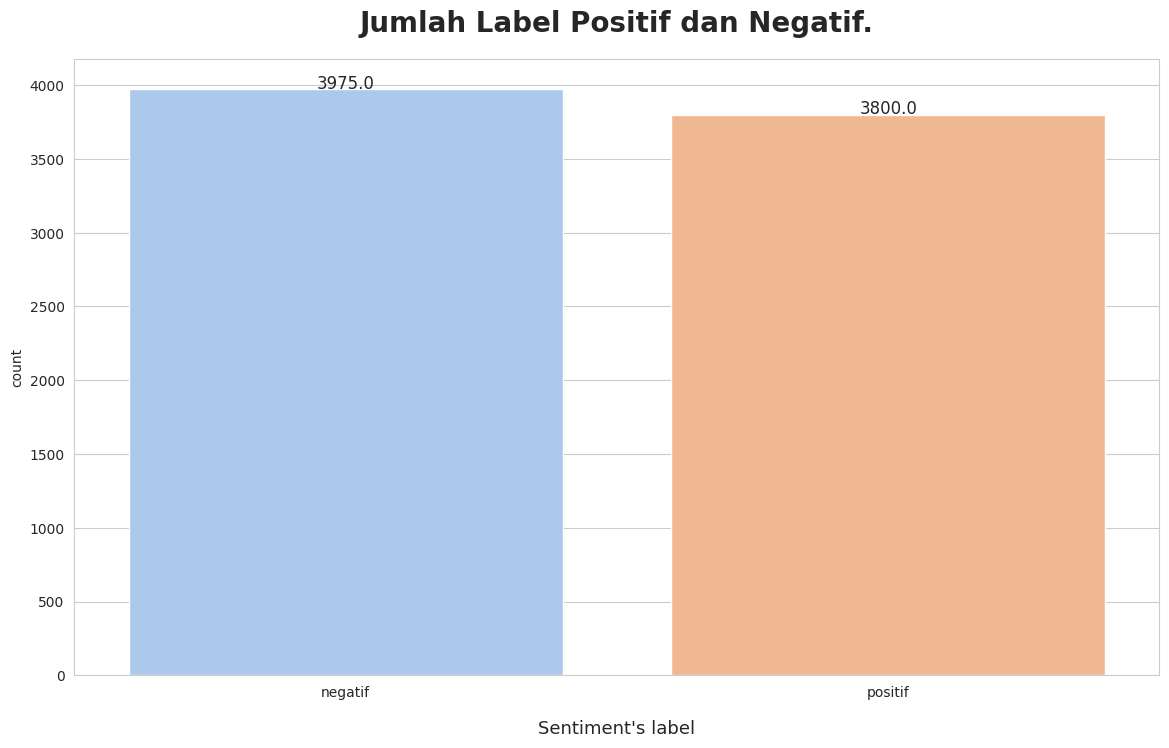

In [94]:
# membuat visualisasi bar chart untuk menampilkan jumlah sentimen positif dan negatif

fig, ax = plt.subplots(figsize=(14,8))
ax = sns.countplot(x='polarity', data=halodoc, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 3.25,rect.get_height(),horizontalalignment='center', fontsize = 12)

plt.title("Jumlah Label Positif dan Negatif.", fontsize=20, fontweight='bold',pad=20)
plt.xlabel("Sentiment's label", fontsize=13, labelpad=15)
plt.ylim(0)
plt.show()

In [95]:
# mengonversikan sentimen menjadi 1 untuk positif dan -1 untuk negatif
polarity = []
for convert in halodoc['polarity']:
  if convert == "positif":
    num_polarity = 1
  else:
    num_polarity = -1

  polarity.append(num_polarity)
halodoc['polarity'] = polarity

In [96]:
halodoc['polarity']

0      -1
1       1
2      -1
3      -1
4       1
       ..
7770   -1
7771   -1
7772   -1
7773    1
7774    1
Name: polarity, Length: 7775, dtype: int64

In [97]:
halodoc.polarity.value_counts()

polarity
-1    3975
 1    3800
Name: count, dtype: int64

In [98]:
print("percentage of sentiment:")
train_pct_pos = halodoc.polarity.value_counts()[1]/halodoc.polarity.value_counts().sum()*100
print("percentage of positive sentiment:", round(train_pct_pos,2), '%')

train_pct_neg = halodoc.polarity.value_counts()[-1]/halodoc.polarity.value_counts().sum()*100
print("percentage of negative sentiment:", round(train_pct_neg,2), '%')

print("difference between percentage positive and negative:", round(train_pct_pos-train_pct_neg,2), '%')

percentage of sentiment:
percentage of positive sentiment: 48.87 %
percentage of negative sentiment: 51.13 %
difference between percentage positive and negative: -2.25 %


#### Wordcloud for positive sentiment

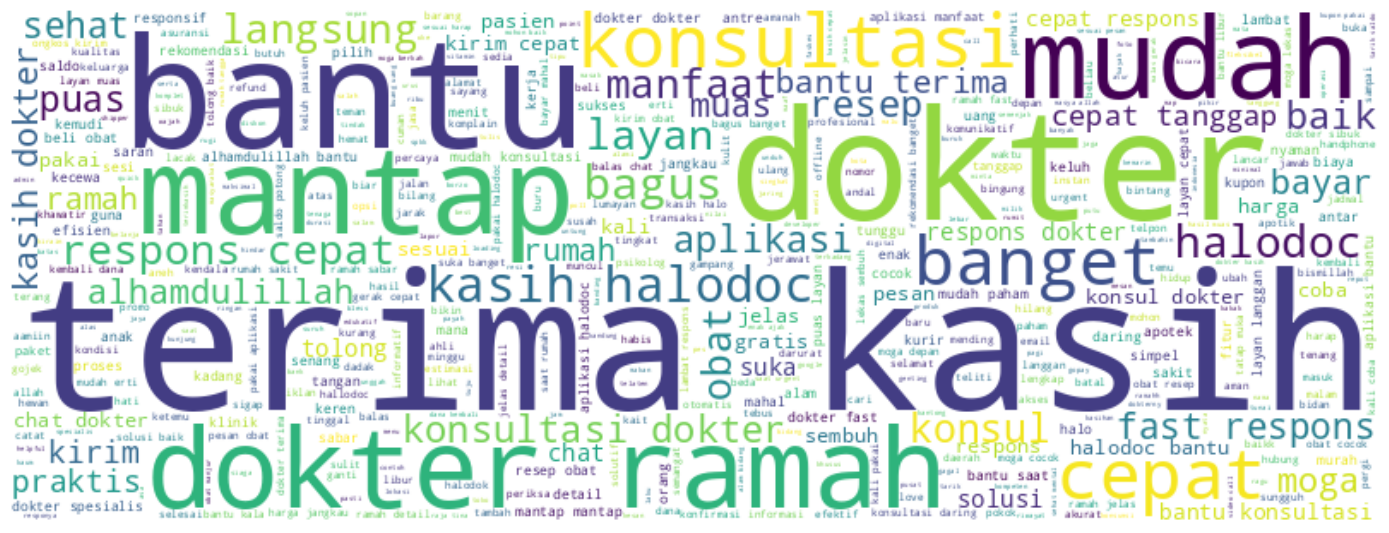

In [99]:
sentiment_pos = ' '.join([review for review in halodoc['stem_review'][halodoc['polarity'] == 1]])

# create object wordcloud
w_pos = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_pos)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_pos, interpolation="bilinear")
plt.show()

#### Wordcloud for negative sentiment

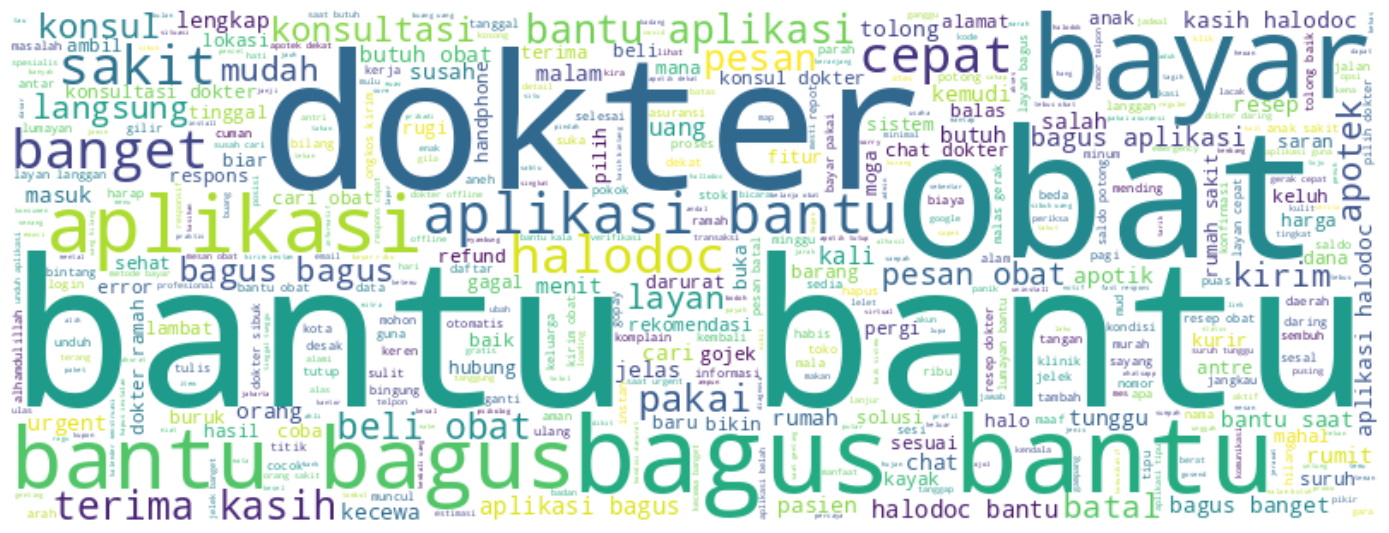

In [100]:
sentiment_neg = ' '.join([review for review in halodoc['stem_review'][halodoc['polarity'] == -1]])

# create object wordcloud
w_neg = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_neg)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_neg, interpolation="bilinear")
plt.show()

In [101]:
halodoc = halodoc.replace('',np.nan, regex=True)

In [102]:
halodoc = halodoc.dropna()

In [103]:
halodoc = halodoc.reset_index(drop=True)

In [104]:
halodoc.to_excel("halodoc_fix_dataset.xlsx", index=False)



---



# Split the review into data train and test

In [105]:
X = halodoc['stem_review']
y = halodoc['polarity']

In [106]:
halodoc.head()

,content,replyContent,repliedAt,clean_review,normalization,final_text,token,stop_review,stem_review,prepos_text,polarity_score,polarity
0,Pelayanan sangat bagus.,Hai Liana! Terima kasih sudah menggunakan Halo...,2024-06-06 00:21:40,pelayanan sangat bagus,pelayanan sangat bagus,pelayanan sangat bagus,"[pelayanan, sangat, bagus]","[pelayanan, bagus]",layan bagus,"[layan, bagus]",-2,-1
1,Ini pesen obat lewat apotek halodoc terkonfirm...,Hai MELANI PUTRI! Mohon maaf atas ketidaknyama...,2024-06-06 00:05:32,ini pesen obat lewat apotek halodoc terkonfirm...,ini pesan obat lewat apotek halodoc terkonfirm...,pesan obat lewat apotek halodoc terkonfirmasi...,"[pesan, obat, lewat, apotek, halodoc, terkonfi...","[pesan, obat, apotek, halodoc, terkonfirmasi, ...",pesan obat apotek halodoc konfirmasi kirim moh...,"[pesan, obat, apotek, halodoc, konfirmasi, kir...",1,1
2,Aplikasi ini sangat membantu,Hai ayu budi kartika! Terima kasih sudah mengg...,2024-06-05 16:39:39,aplikasi ini sangat membantu,aplikasi ini sangat membantu,aplikasi sangat membantu,"[aplikasi, sangat, membantu]","[aplikasi, membantu]",aplikasi bantu,"[aplikasi, bantu]",-5,-1
3,bagus dan cepat sampai barangnya,Hai Andryan! Terima kasih sudah menggunakan Ha...,2024-06-05 16:39:16,bagus dan cepat sampai barangnya,bagus dan cepat sampai barangnya,bagus cepat sampai barangnya,"[bagus, cepat, sampai, barangnya]","[bagus, cepat, barangnya]",bagus cepat barang,"[bagus, cepat, barang]",-2,-1
4,Dokternya ramah,Hai Hanum Balqis! Terima kasih sudah menggunak...,2024-06-05 16:38:52,dokternya ramah,dokternya ramah,dokternya ramah,"[dokternya, ramah]","[dokternya, ramah]",dokter ramah,"[dokter, ramah]",2,1


In [107]:
from sklearn.model_selection import train_test_split

In [108]:
test_num = []
random_num = []
acc_num = []
re_num = []
pre_num = []
matrix = []
report = []

for test in np.arange(0.1, 0.4, 0.1):
  for random in np.arange(0, 30, 5):
    print("test size:", test)
    print("random state:", random)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, random_state=random)
    vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
    X_train_vect = vectorizer.fit_transform(X_train)
    X_test_vect = vectorizer.transform(X_test)
    SVM = SVC(kernel='linear')
    SVM.fit(X_train_vect, y_train)
    print(SVM.score(X_train_vect, y_train))
    predict = SVM.predict(X_test_vect)
    accuracy = accuracy_score(y_test, predict)
    confusion = confusion_matrix(y_test, predict)
    print('confusion matrix:\n', confusion)
    classfication = print(classification_report(y_test, predict))
    print("Accuracy Score:", accuracy.round(2))
    recall = recall_score(y_test, predict)
    print("Recall Score:", recall)
    precision = precision_score(y_test, predict)
    print("Precision Score:", precision)
    print("\n")

    random_num.append(random)
    matrix.append(confusion)
    report.append(classfication)
    acc_num.append(accuracy)
    re_num.append(recall)
    pre_num.append(precision)
    test_num.append(test)
  print("=================================================================")

test size: 0.1
random state: 0
0.9915678147777619
confusion matrix:
 [[384  15]
 [ 13 366]]
              precision    recall  f1-score   support

          -1       0.97      0.96      0.96       399
           1       0.96      0.97      0.96       379

    accuracy                           0.96       778
   macro avg       0.96      0.96      0.96       778
weighted avg       0.96      0.96      0.96       778

Accuracy Score: 0.96
Recall Score: 0.9656992084432717
Precision Score: 0.9606299212598425


test size: 0.1
random state: 5
0.9911390595969701
confusion matrix:
 [[398  24]
 [ 15 341]]
              precision    recall  f1-score   support

          -1       0.96      0.94      0.95       422
           1       0.93      0.96      0.95       356

    accuracy                           0.95       778
   macro avg       0.95      0.95      0.95       778
weighted avg       0.95      0.95      0.95       778

Accuracy Score: 0.95
Recall Score: 0.9578651685393258
Precision Score:

### Mencari parameter untuk data splitting terbaik yang menghasilkan nilai akurasi paling tinggi dan meminimalisir model melakukan kesalahan prediksi

In [109]:
# memasukkan data ke dalam dataframe

data = {'test_size':test_num,
        'random_state':random_num,
        'confusion_matrix': matrix,
        'accuracy': acc_num,
        'recall': re_num,
        'precision': pre_num}

optimal = pd.DataFrame(data)
optimal
# optimal = optimal.sort_values(by=['accuracy','recall','precision'], ascending=True)

,test_size,random_state,confusion_matrix,accuracy,recall,precision
0,0.1,0,"[[384, 15], [13, 366]]",0.964010,0.965699,0.960630
1,0.1,5,"[[398, 24], [15, 341]]",0.949871,0.957865,0.934247
2,0.1,10,"[[393, 16], [17, 352]]",0.957584,0.953930,0.956522
3,0.1,15,"[[399, 11], [13, 355]]",0.969152,0.964674,0.969945
4,0.1,20,"[[395, 8], [15, 360]]",0.970437,0.960000,0.978261
5,0.1,25,"[[371, 18], [18, 371]]",0.953728,0.953728,0.953728
6,0.2,0,"[[770, 28], [25, 732]]",0.965916,0.966975,0.963158
7,0.2,5,"[[771, 35], [40, 709]]",0.951768,0.946595,0.952957
8,0.2,10,"[[774, 28], [33, 720]]",0.960772,0.956175,0.962567
9,0.2,15,"[[785, 33], [24, 713]]",0.963344,0.967436,0.955764


In [110]:
# mengatur desimal akurasi, recall, dan precision menjadi 2 angka dibelakang koma

optimal['accuracy'] = optimal['accuracy'].apply(lambda floats:format(float(floats), ".2f"))
optimal['recall'] = optimal['recall'].apply(lambda floats:format(float(floats), ".2f"))
optimal['precision'] = optimal['precision'].apply(lambda floats:format(float(floats), ".2f"))
optimal['test_size'] = optimal['test_size'].apply(lambda floats:format(float(floats), ".1f"))
optimal

,test_size,random_state,confusion_matrix,accuracy,recall,precision
0,0.1,0,"[[384, 15], [13, 366]]",0.96,0.97,0.96
1,0.1,5,"[[398, 24], [15, 341]]",0.95,0.96,0.93
2,0.1,10,"[[393, 16], [17, 352]]",0.96,0.95,0.96
3,0.1,15,"[[399, 11], [13, 355]]",0.97,0.96,0.97
4,0.1,20,"[[395, 8], [15, 360]]",0.97,0.96,0.98
5,0.1,25,"[[371, 18], [18, 371]]",0.95,0.95,0.95
6,0.2,0,"[[770, 28], [25, 732]]",0.97,0.97,0.96
7,0.2,5,"[[771, 35], [40, 709]]",0.95,0.95,0.95
8,0.2,10,"[[774, 28], [33, 720]]",0.96,0.96,0.96
9,0.2,15,"[[785, 33], [24, 713]]",0.96,0.97,0.96


### Visualisasi grafik untuk melihat kenaikan akurasi terbaik berdasarkan test_size

In [111]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='accuracy',color='test_size',
              text='accuracy', markers=True)
fig.update_traces(textposition='top left')
fig.show()

### Visualisasi grafik untuk melihat kenaikan recall terbaik berdasarkan test_size

In [112]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='recall',color='test_size',
              text='recall', markers=True)
fig.update_traces(textposition='top left')
fig.show()

### Visualisasi grafik untuk melihat kenaikan precision terbaik berdasarkan test_size

In [113]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='precision',color='test_size',
              text='precision', markers=True)
fig.update_traces(textposition='top left')
fig.show()

Berdasarkan hasil penelitian di atas terkait parameter test_size dan random_state terbaik, diperoleh bahwa ukuran test_size = 0,1 dan random_state = 20 memperoleh nilai akurasi, recall, dan precision lebih tinggi dibandingkan ukuran yang lain. Sehingga ukuran tersebut akan digunakan untuk melakukan splitting dataset.

## Data Splitting into data train and data test

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=20)

In [115]:
X_train.shape

(6997,)

In [116]:
X_test.shape

(778,)

In [117]:
X_train

1276                                                bantu
3562    kali konsultasi daring halodoc alhamdulillah c...
6023                      gerak cepat banget pelayannanya
3655                                                bantu
5145                                    moga bantu aamiin
                              ...                        
7068                                  cepat sesuai oderan
7391                                         mantap bantu
4367                    bagus banget dokter cepat respons
2522    keluh tanggap sabar teliti dokter alhamdulilla...
7523                                                bantu
Name: stem_review, Length: 6997, dtype: object

In [118]:
print(X_train)

1276                                                bantu
3562    kali konsultasi daring halodoc alhamdulillah c...
6023                      gerak cepat banget pelayannanya
3655                                                bantu
5145                                    moga bantu aamiin
                              ...                        
7068                                  cepat sesuai oderan
7391                                         mantap bantu
4367                    bagus banget dokter cepat respons
2522    keluh tanggap sabar teliti dokter alhamdulilla...
7523                                                bantu
Name: stem_review, Length: 6997, dtype: object


# Vector Representation

## TF IDF

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [120]:
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
dense_num = X_train_vect.todense()

In [121]:
y_train.shape

(6997,)

In [122]:
X_train_vect

<6997x3272 sparse matrix of type '<class 'numpy.float64'>'
	with 32452 stored elements in Compressed Sparse Row format>

In [123]:
print(X_train_vect)

  (0, 287)	1.0
  (1, 1395)	0.23484539208921185
  (1, 3020)	0.2376854111842177
  (1, 251)	0.2244504199196374
  (1, 2505)	0.3321705079673155
  (1, 570)	0.4057802618867046
  (1, 78)	0.35818529585230874
  (1, 1093)	0.2477616487875491
  (1, 631)	0.40491135105440995
  (1, 1538)	0.2591521315358709
  (1, 1362)	0.3770740756872866
  (2, 2228)	0.7506346505411062
  (2, 279)	0.31371369692060946
  (2, 535)	0.2739634518238463
  (2, 1021)	0.5129087295379153
  (3, 287)	1.0
  (4, 1)	0.8261829838311022
  (4, 1918)	0.5176791914513161
  (4, 287)	0.22232843265369379
  (5, 1625)	0.34953418442040496
  (5, 1490)	0.2688886889769959
  (5, 864)	0.5783796634853866
  (5, 2400)	0.5090118914804319
  (5, 544)	0.2888790070744379
  (5, 1412)	0.3352764652273064
  :	:
  (6991, 2820)	0.7295512958299821
  (6991, 535)	0.45239496750672925
  (6992, 2101)	0.8446762020819034
  (6992, 2743)	0.4598844415837151
  (6992, 535)	0.27391315051622855
  (6993, 1770)	0.887148271584272
  (6993, 287)	0.46148450052524953
  (6994, 2511)	0.5032

In [124]:
df_tf = pd.DataFrame(X_train_vect.todense(), columns = vectorizer.get_feature_names_out())
df_tf.to_excel('tfidf.xlsx', index=False, header=True)



---



# Data Modeling

In [125]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [126]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train_vect, y_train)

SVC(kernel='linear')

In [127]:
predict = svm.predict(X_test_vect)

In [128]:
predict

array([ 1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,
        1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,
       -1, -1, -1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1,
       -1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1,
        1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1,
       -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
       -1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,
        1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1,
        1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [129]:
predict_df = pd.DataFrame(predict, columns=['predict'])
# predict_df['y_actual'] = y_test.ravel()

In [130]:
predict_df

,predict
0,1
1,1
2,-1
3,1
4,1
...,...
773,1
774,-1
775,-1
776,-1


In [131]:
print(svm.coef_) # values of weight

  (0, 3146)	0.028278886009988964
  (0, 2617)	0.12881679571871704
  (0, 2384)	0.12881679571871704
  (0, 2214)	0.12881679571871704
  (0, 378)	0.12881679571871704
  (0, 2535)	0.2521388416304318
  (0, 790)	0.2521388416304318
  (0, 227)	0.2521388416304318
  (0, 1602)	0.29864365968642537
  (0, 1316)	0.6899108219025691
  (0, 2421)	0.14984367453445718
  (0, 1016)	0.4961030339826574
  (0, 1830)	0.04253996155172767
  (0, 2751)	0.30699662689107593
  (0, 1907)	0.30699662689107593
  (0, 826)	0.30699662689107593
  (0, 1237)	0.4906780796789589
  (0, 2002)	0.47896539663863263
  (0, 2691)	0.3840171706177951
  (0, 564)	0.3840171706177951
  (0, 703)	0.20430838324434678
  (0, 683)	0.20430838324434678
  (0, 1224)	0.1752675144502712
  (0, 203)	0.6591801294048653
  (0, 1773)	0.12870507764293423
  :	:
  (0, 2817)	-0.5451413126832004
  (0, 1629)	2.214216116768919
  (0, 1536)	0.5001709266265979
  (0, 1500)	0.016267375406579687
  (0, 1362)	-0.257719924248077
  (0, 1358)	-0.5835406009060922
  (0, 166)	-4.95744890

In [132]:
print(svm.intercept_) # values of b

[-0.01007831]


In [133]:
print(svm.classes_) # class of sentiment

[-1  1]


In [134]:
print(svm.dual_coef_)

  (0, 0)	-1.0
  (0, 1)	-1.0
  (0, 2)	-0.17349535964096643
  (0, 3)	-0.634305628527539
  (0, 4)	-1.0
  (0, 5)	-1.0
  (0, 6)	-1.0
  (0, 7)	-0.9575922308717205
  (0, 8)	-0.17329666116240638
  (0, 9)	-1.0
  (0, 10)	-0.7316583476868465
  (0, 11)	-1.0
  (0, 12)	-0.9168801647773542
  (0, 13)	-1.0
  (0, 14)	-0.2824693438667347
  (0, 15)	-0.4879085126198108
  (0, 16)	-1.0
  (0, 17)	-0.6324228488482843
  (0, 18)	-1.0
  (0, 19)	-1.0
  (0, 20)	-1.0
  (0, 21)	-0.834996493125128
  (0, 22)	-0.5294002989045664
  (0, 23)	-1.0
  (0, 24)	-0.09979281282329815
  :	:
  (0, 1693)	1.0
  (0, 1694)	1.0
  (0, 1695)	1.0
  (0, 1696)	1.0
  (0, 1697)	0.35755132534410433
  (0, 1698)	0.4587131228082427
  (0, 1699)	1.0
  (0, 1700)	0.7254882508169497
  (0, 1701)	1.0
  (0, 1702)	0.7076788706115248
  (0, 1703)	0.857182366833997
  (0, 1704)	1.0
  (0, 1705)	0.2870060296634736
  (0, 1706)	0.05385191256549182
  (0, 1707)	1.0
  (0, 1708)	0.8225267065397727
  (0, 1709)	0.4195691489832931
  (0, 1710)	1.0
  (0, 1711)	0.6834489769

In [135]:
svm.score(X_train_vect, y_train) # the mean accuracy on the given train data and labels.

0.9909961412033729

In [136]:
svm.score(X_test_vect, y_test) # the mean accuracy on the given train data and labels.

0.9704370179948586

In [137]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, predict))

0.11825192802056556




---



## Final Visualization that represented the result of Predicted

In [138]:
predict_df = pd.DataFrame(predict, columns=['predictvalues'])
polarity = ""
sentimen = []
for sentiment in predict_df['predictvalues']:
  if sentiment == 1:
    polarity = "positif"
  else:
    polarity = "negatif"

  sentimen.append(polarity)

predict_df['sentimen'] = sentimen

print(predict_df.predictvalues.value_counts()[1])
print(predict_df.predictvalues.value_counts()[-1])

368
410


In [139]:
prediction_df_group = predict_df.groupby(['predictvalues'])[['sentimen']].count().reset_index()
prediction_df_group

,predictvalues,sentimen
0,-1,410
1,1,368


In [140]:
print("Number of sentiment after modelling:")
sen_pos = predict_df.predictvalues.value_counts()[1]/predict_df.predictvalues.value_counts().sum()*100
print("percentage of positive sentiment:", round(sen_pos,2), '%')

sen_neg = predict_df.predictvalues.value_counts()[-1]/predict_df.predictvalues.value_counts().sum()*100
print("percentage of negative sentiment:", round(sen_neg,2), '%')

print("difference between percentage positive and negative:", round(sen_pos-sen_neg,2), '%')

Number of sentiment after modelling:
percentage of positive sentiment: 47.3 %
percentage of negative sentiment: 52.7 %
difference between percentage positive and negative: -5.4 %


### Pie Chart

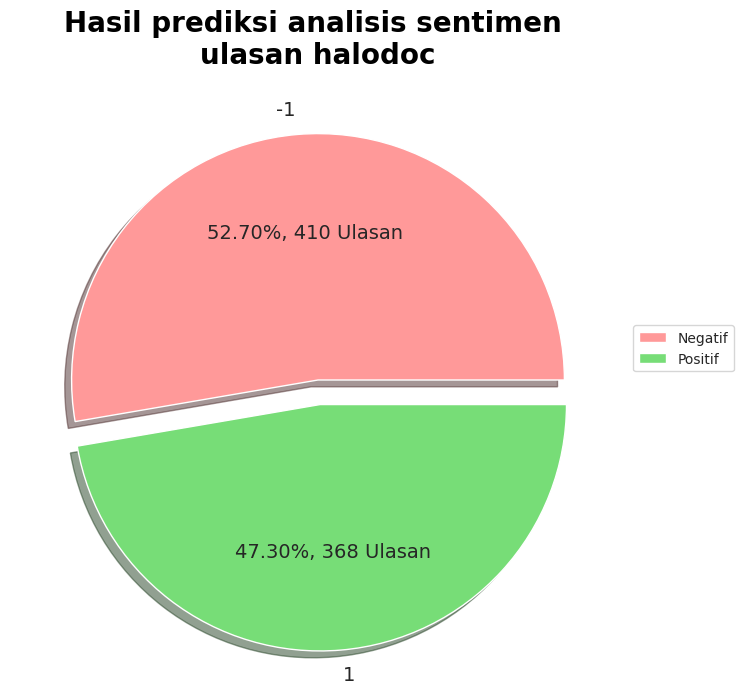

In [141]:
fig, ax = plt.subplots(figsize=(12,8))
explode = (0,0.1)
my_colors = ['#ff9999','#77dd77']
ax.pie(prediction_df_group.sentimen, labels=prediction_df_group.predictvalues,
         autopct=lambda p:f'{p:.2f}%, {p*sum(prediction_df_group.sentimen)/100 :.0f} Ulasan', explode=explode, shadow=True, colors=my_colors,
          startangle=0, textprops={'fontsize': 14})
ax.set_title('Hasil prediksi analisis sentimen \nulasan halodoc', color='black',weight='bold',fontsize=20)

plt.legend(bbox_to_anchor = (1,0.6),labels=['Negatif','Positif'])

# plt.savefig('Hasilprediksi_halodoc.png')
plt.show()



---



# Evaluation

In [142]:
matrix = confusion_matrix(y_test, predict)
matrix

array([[395,   8],
       [ 15, 360]])

### Confusion matrix visualization

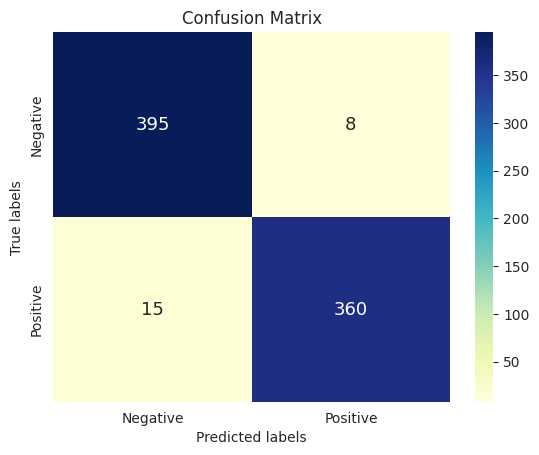

In [143]:
ax = plt.subplots()
ax = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g',
            annot_kws={"fontsize":13})

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

In [144]:
target_names = ['Negative','Positive']
print(classification_report(y_test, predict, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.96      0.98      0.97       403
    Positive       0.98      0.96      0.97       375

    accuracy                           0.97       778
   macro avg       0.97      0.97      0.97       778
weighted avg       0.97      0.97      0.97       778



In [145]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

akurasi = accuracy_score(y_test, predict)
print("Accuracy model:", round(akurasi,2))

recall = recall_score(y_test, predict)
print("Recall model:", round(recall,2))

precision = precision_score(y_test, predict)
print("Precision model:", round(precision,2))

Accuracy model: 0.97
Recall model: 0.96
Precision model: 0.98


Berdasarkan penelitian yang telah dilakukan menggunakan metode Lexicon-Based dan algoritma Support Vector Machine, didapatkan nilai accuracy sebesar 94%, recall sebesar 96%, precision sebesar 96%, dan kesalahan prediksi sebanyak 9 data. Selain itu, diperoleh juga hasil prediksi data uji ulasan halodoc sebagai sentimen positif sebanyak 114 ulasan dan sentimen negatif sebanyak 48 ulasan. Diketahui bahwa algoritma Support Vector Machine cenderung memprediksi data uji sebagai sentimen positif dibandingkan sentimen negatif. Oleh karena itu, dapat ditarik sebuah asumsi bahwa pengguna senang, serta suka terhadap pelayanan, pengiriman, kualitas, dan harga produk yang diberikan oleh halodoc.